# Perceptrons

This notebook serves as a step-by-step tutorial for creating a simple feedforward neural network with one layer for a binary image classification. This simple is also referred to as the [perceptron](https://en.wikipedia.org/wiki/Perceptron). You can further enhance it by adding more layers and adjusting hyperparameters.

## The MNIST data set

In our neural network lectures we will be using the MNIST (Modified National Institute of Standards and Technology) data set, comprising pixelated images of handwritten digits from 0 to 9. Each image consists of grayscale pixels ranging from 0 (no marking) to 255 (darkest marking), measuring handwriting intensity. Originally, it held 60,000 training images and 10,000 test images. More background information on the data set can be found at it's Wikipedia page https://en.wikipedia.org/wiki/MNIST_database. Throughout our neural network lectures, we'll engage with a smaller, lower-resolution `sklearn` version. This sklearn version offers reduced image quality for quicker data loading and algorithm fitting. You can access it using the load_digits function from the datasets module [here](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html).
sklearn version


In [2]:
## For data handling
import pandas as pd
import numpy as np

## For plotting
import matplotlib.pyplot as plt
from seaborn import set_style

## This sets the plot style
## to have a grid on a white background
set_style("whitegrid")

In [3]:
from sklearn.datasets import load_digits

## Load the dataset and call it digits
digits,l = load_digits(return_X_y=True)



Let's dive into our dataset. We can start by figuring out what type each data point is and how many we've got.

In [4]:
## Type of X
#type(digits)

Seems like it is a big list of lists. Let's have a look:

In [5]:
#digits

How many internal lists do we have?

In [6]:
## Length of digits
#len(digits)

In [7]:
## lets what is the first list in digits
#digits[0]

This is our first image represented as pixel vector (as explained in the prevous lecture). How many pixels does it have?

In [8]:
#len(digits[0,:])

From this we can see that the data contains  1,797 images, each of which represents an $8\times8$ image.
Let's see the first image.

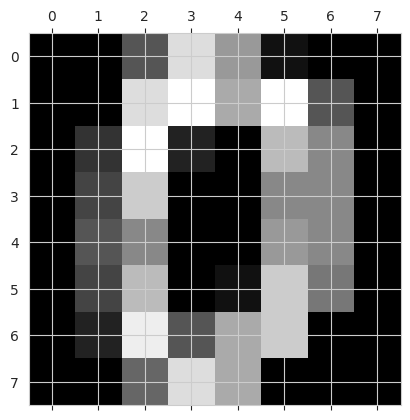

In [ ]:
#Let's confirm the previous fact by plotting X[0].
plt.matshow(X[0, :].reshape(8, 8))
plt.gray()
plt.show()

How can we know what number it represents without printing it?

In [9]:
# What digit does X[0] represent?
#l[0]

It would be great if we could display the image with its associated label.

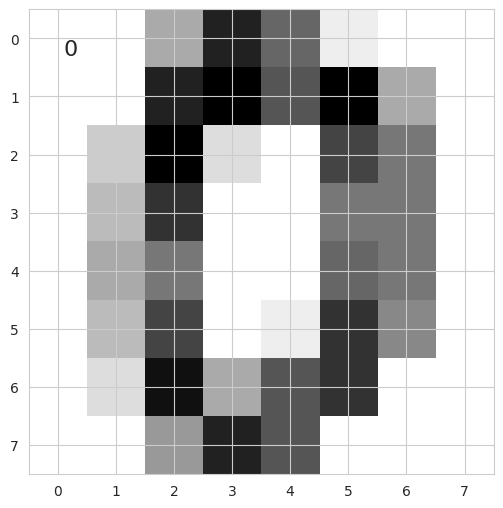

In [ ]:
fig, ax = plt.subplots(figsize=(6, 10))  # Creating figure and axes

# Displaying the image
ax.imshow(X[0, :].reshape(8, 8), cmap='gray_r')

# Adding label text
ax.text(.1, .3, str(y[0]), fontsize=16)
# Displaying the plot
plt.show()


We can also create subplots for the first six images.

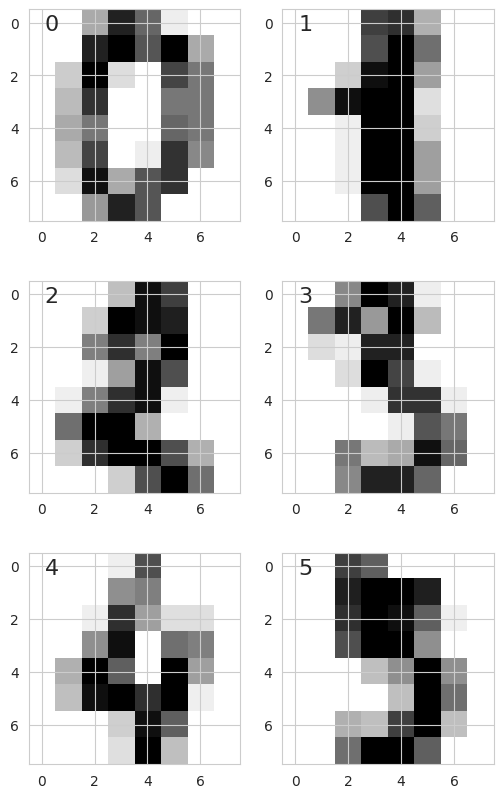

In [ ]:
## plot the first 6 images together without

# Creating subplots with a 3x2 grid and defining figure size
fig, ax = plt.subplots(3, 2, figsize=(6, 10))

# Iterating through the subplots
for i in range(6):
    # Displaying images and associated labels
    ax[i // 2, i % 2].imshow(X[i, :].reshape(8, 8), cmap='gray_r')  # Displaying the image
    ax[i // 2, i % 2].text(.1, .3, str(y[i]), fontsize=16)  # Adding label text

# Displaying the plot
plt.show()


## Problem and Data Preprocessing:

We want to devcelop a model that recognize the digit zero. So a function that takes in an image, if the image represents a zero returns 0 and otherwise 1.

The dataset is already clean and we don't have to do a lot of work.


In [10]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits, l, test_size=0.2, random_state=42)

In [11]:
#Let's have a look at the train labels


In [12]:
#Let's have a look at the test labels


In [ ]:
# Convert labels to binary classification: 0 if the digit is 0, else 1
y_train_binary = np.where(y_train < 1, 0, 1)
y_test_binary = np.where(y_test < 1, 0, 1)

In [13]:
#Let's have a look at the train labels for binary classification


In [14]:
#Let's have a look at the test labels for binary classification


## A Perceptron For Binary Classification

Our objective is to design a single-layer feedforward deep learning model $F(x) = \text{ReLU}(Wx + b)$ that receives an image $x$ from the MNIST dataset and determines whether it represents the digit zero or not.


Recall:

1. The expression $Ax + b$ adjusts $x$ by weights and bias, where

- $x$ is the input (our data)
- $W$ is a weight matrix
- $b$ is a bias vector.

2. The Rectified Linear Unit (ReLU), defined as $\text{ReLU}(z) = \max(0, z)$, adds a non-linear component to our model, helping neural networks capture complex patterns in the data.

Basically, it converts negative values to 0 and leaves positive values unchanged. ReLU is applied element-wise, giving an output with the same dimensions as $Ax + b$, but with non-negative values only.

Okay let's go:


__Step 1__ Start with initializing parameters: weights (A) and bias (b)


In [ ]:
import numpy as np

def initialize_parameters(input_size, output_size):
    weights = np.random.randn(input_size, output_size)
    bias = np.random.rand(1, output_size)
    return weights, bias

__Step 2:__ Define the ReLu function. Recall that $Relu(x) = max(x,0)$

In [ ]:
def relu(x):
    return np.maximum(0, x)

__Step 3__ Now its time to define our $F$

In [ ]:
def forward_propagation(x, weights, bias):
    z = np.dot(x, weights) + bias # matrix multiplication
    return relu(z)

__Step 4__  So now it's time to define our model. That is a function to iterates through the training dataset, adjusting the weights and bias in each iteration to improve the network's performance in predicting the output based on the given inputs.


One complete cycle through the entire training dataset is called _epoch_ (the entire training dataset will be passed forward and backward through the neural network).

So we need a model with the following variables: an image: `x`, its coresponding label: `y`, `weights`: $W$  and `bias`: $b$, the number of epochs: `epochs`, and the learning rate: `learning_rate`.

Your function should iterates through the dataset for the specified number of epochs, adjusting the weights and bias in each iteration to improve the network's performance in predicting the output based on the given inputs.


In [ ]:
def train_neural_network(x, y, weights, bias, epochs, learning_rate):
    for epoch in range(epochs):
        # Forward propagation
        output = forward_propagation(x, weights, bias)

        # Calculate the loss
        error = output - y
        loss = np.mean(error ** 2)

        # Backpropagation
        # Chain rule to compute gradients
        grad_output = 2 * error / len(x) #gradient of loss with respect to output
        grad_weights = np.dot(x.T, grad_output) #gradient of loss with respect to weights by chain rule
        grad_bias = np.sum(grad_output, axis=0, keepdims=True) #gradient of loss with respect to bias by chain rule

        # Update weights and bias
        weights -= learning_rate * grad_weights
        bias -= learning_rate * grad_bias

        # Print the loss
        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss {loss}')
    return weights, bias

In [ ]:
# Initialize parameters

input_size = X_train.shape[1] # input size should be the size of each image 8x8
output_size = 1 # input size should be the size of lable of each image 8x8

weights, bias = initialize_parameters(input_size, output_size)

# Reshape the target arrays to match the expected shapes
y_train_binary = y_train_binary.reshape(-1, 1)
y_test_binary = y_test_binary.reshape(-1, 1)

# Train the neural network
W , b = train_neural_network(X_train, y_train_binary, weights, bias, epochs=80, learning_rate=0.01)


Epoch 0: Loss 101.41254868742895
Epoch 10: Loss 154.8256666907658
Epoch 20: Loss 64.71136879058143
Epoch 30: Loss 0.8990953375086986
Epoch 40: Loss 0.8990953375086986
Epoch 50: Loss 0.8990953375086986
Epoch 60: Loss 0.902240490448945
Epoch 70: Loss 0.8990953375086986


In [ ]:
# Predict using the trained model
predictions = forward_propagation(X_test, W, b)
predicted_labels = np.where(predictions >= 0.5, 0, 1)

# Calculate accuracy
accuracy = np.mean(predicted_labels == y_test_binary)
print(f'Test accuracy: {accuracy * 100:.2f}%')


Test accuracy: 90.83%


__Discussion__ Looks good! If we pick a random sample, do you think it prdicts the lable correctly?

In [ ]:
# Choose a random example from the test set
index = np.random.randint(0, len(X_test))
image = X_test[index]
label = y_test_binary[index]
# Reshape the example image to match the input size of the network
image = image.reshape(1, -1)

# Use the trained model to predict on this example
prediction = forward_propagation(image, W, b)
predicted_label = 1 if prediction >= 0.5 else 0

# Print the prediction and actual label
print(f"Predicted Label: {predicted_label}")
print(f"Actual Label: {label}")


Predicted Label: 0
Actual Label: [1]


__Discussion:__


Q1. Judging by the accuracy, how well is your model performing?

_Your Answer:_


Q2: Convert labels to a different binary classification: 1 if the digit is less than 5; otherwise, 0. Then, retrain your model. How well is your model performing now?

_Your Answer:_


Q3: A common reason for this behavior is the lack of feature normalization. Normalize the dataset using standardization (Z-score normalization), which rescales the data to have a mean of 0 and a standard deviation of 1. apply this normalization, retrain the model, and observe the impact on the training process and loss values. Did it help at all?


_Your Answer_






In [16]:
#For Q3:
from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler()
#dataset = scaler.fit_transform(dataset)

## Conclusion:

A single perceptron is not capable of separating data sets that are not linearly separable. This severely hurt interest in the method back in the 1950s and 60s, <a href="https://en.wikipedia.org/wiki/Perceptron">https://en.wikipedia.org/wiki/Perceptron</a>.

However, if your data is linearly separable there is a proof that guarantees the perceptron will converge as well as an upper bound on the number of epochs it must endure to get there, see the previous wikipedia link.
